In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

# partie 1 nettoyage

In [3]:
movies_df = pd.read_csv("movies_metadata.csv", low_memory=False)
credits_df =pd.read_csv("credits.csv")
keywords_df=pd.read_csv("keywords.csv")

# les dimentions de chaque dataset

In [4]:
print(f"movies est {movies_df.shape}")
print(f"credits est {credits_df.shape}")
print(f"keywords est {keywords_df.shape}")

movies est (45466, 24)
credits est (45476, 3)
keywords est (46419, 2)


# les informations de la dataset de movies_df

In [17]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### descréption de colonne 

adult : Indique si un film est réservé aux adultes (True/False).

budget : Budget du film en dollars.

genres : Liste des genres du film (action, comédie, drame, etc.).

id : Identifiant unique du film dans la base de données.

imdb_id : Identifiant unique du film sur IMDb.

original_language : Langue originale du film.

overview : Brève description ou synopsis du film.

popularity : Score de popularité basé sur les interactions et les recherches des utilisateurs.

production_companies : Liste des sociétés de production du film.

production_countries : Pays où le film a été produit.

release_date : Date de sortie du film.

revenue : Revenus générés par le film en dollars.

runtime : Durée du film en minutes.

status : Statut du film (Released, Post-production, etc.).

title : Titre du film.

video : Indique si le film a une bande-annonce disponible (True/False).

vote_average : Note moyenne des utilisateurs.

vote_count : Nombre de votes reçus par le film.

keywords : Mots-clés associés au film, pouvant être utilisés pour la recommandation.

cast : Liste des acteurs principaux du film.

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
movies_df.isna().sum() #les valeurs manquantes

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [7]:
colonnes_a_supprimer = ['belongs_to_collection', 'homepage', 'tagline','spoken_languages', 'original_title','poster_path']
movies_df = movies_df.drop(colonnes_a_supprimer, axis=1)

pourquoi supprimer ces colonnes?
belongs_to_collection: ce colonne contient 40k des valeurs nan .
homepage : ce sont des lien .
tagline : ce colonne contient 25k des valeurs nan .
spoken_language: meme colonne de original-languge.
original_title : meme colonne de titre.
pster_path : contient des lien.


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   overview              44512 non-null  object 
 7   popularity            45461 non-null  object 
 8   production_companies  45463 non-null  object 
 9   production_countries  45463 non-null  object 
 10  release_date          45379 non-null  object 
 11  revenue               45460 non-null  float64
 12  runtime               45203 non-null  float64
 13  status                45379 non-null  object 
 14  title                 45460 non-null  object 
 15  video              

In [9]:
movies_df=movies_df.dropna() # supprimer les valeurs manquante

<Axes: >

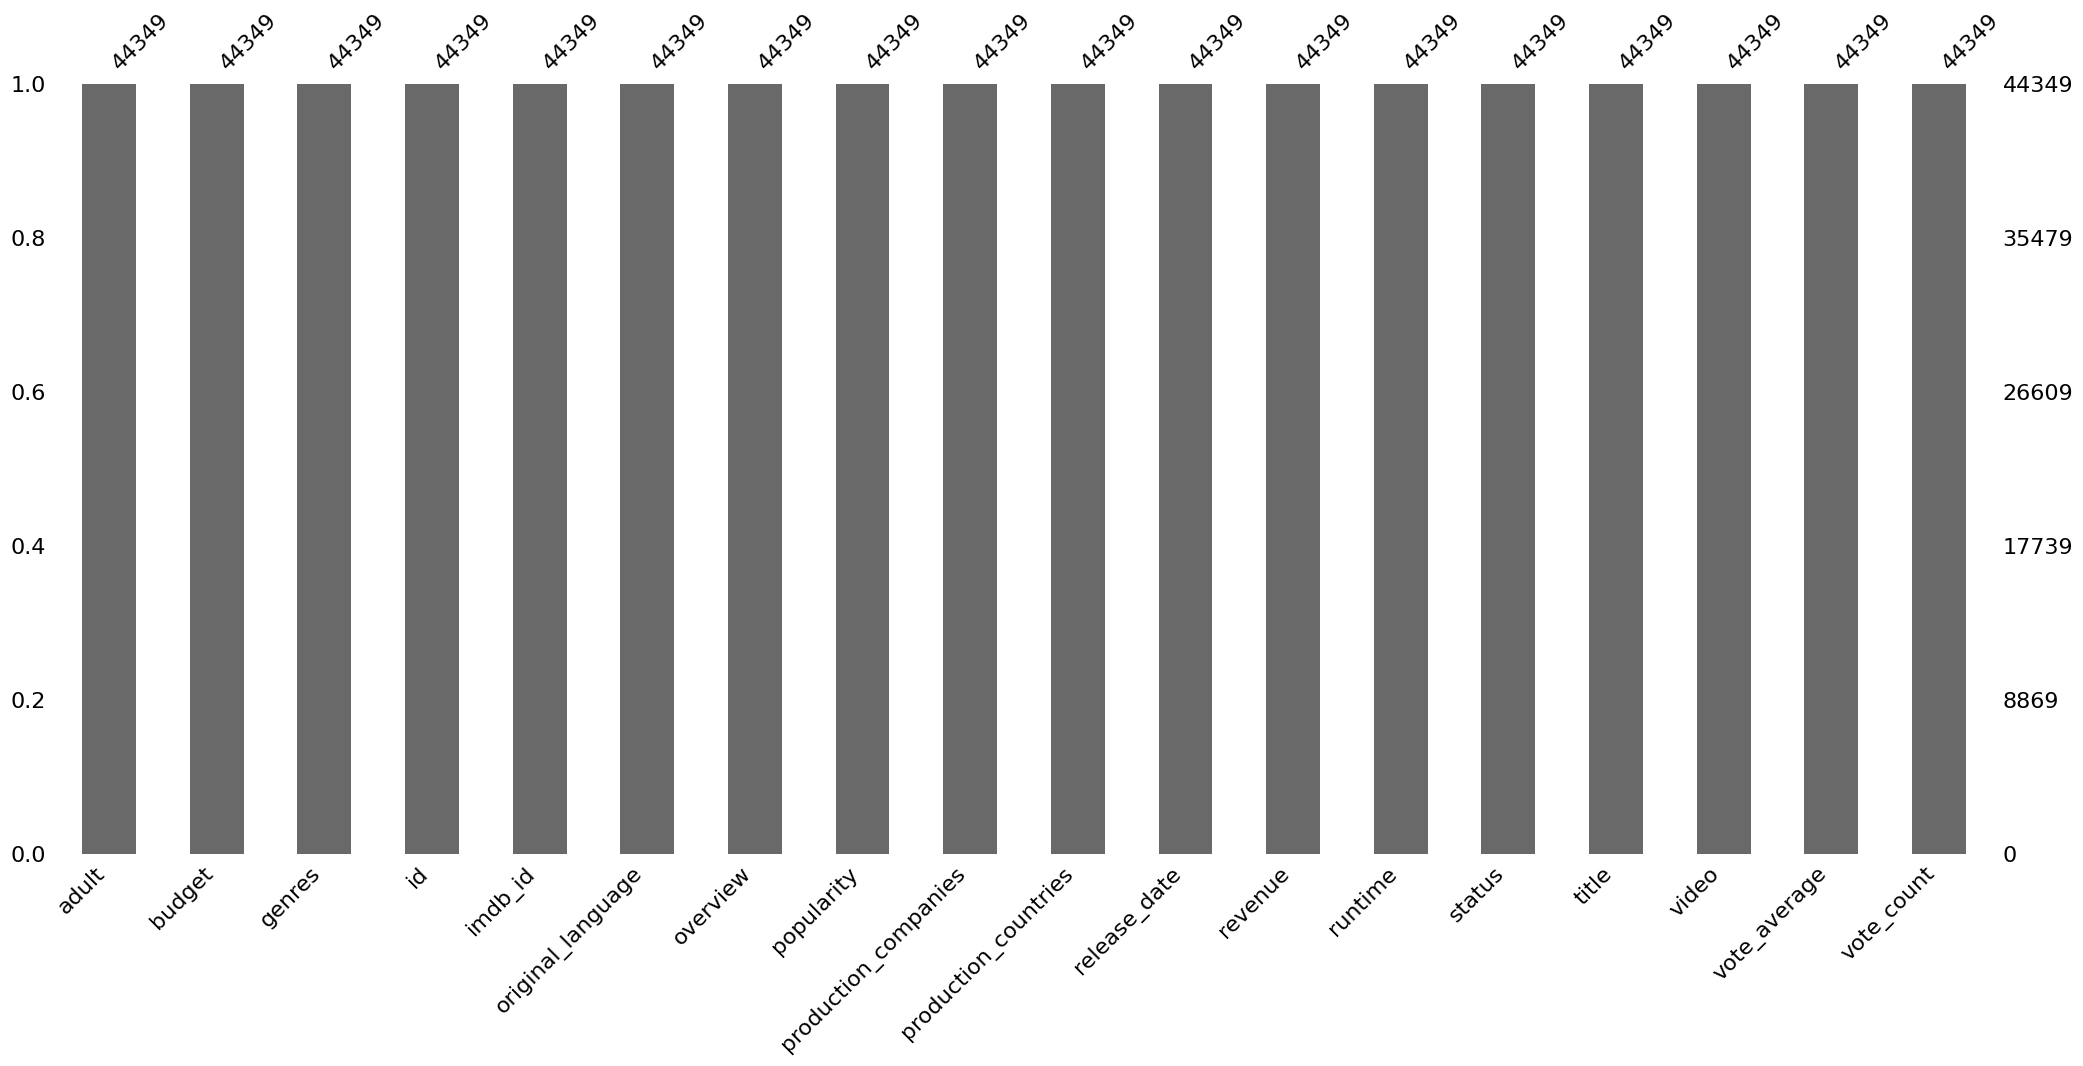

In [10]:
msno.bar(movies_df)

In [11]:
movies_df.isna().sum() 

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [12]:
import ast
from ast import literal_eval # cette fontion prend sauf le contenu de nom de chque liste de dictionnaire


def convert(obj):

    L = []

    for i in literal_eval(obj):
        L.append(i['name'])

    return L

In [13]:
movies_df['genres'] = movies_df['genres'].apply(convert)
movies_df['production_companies'] = movies_df['production_companies'].apply(convert)
movies_df['production_countries'] = movies_df['production_countries'].apply(convert)

In [14]:
# Convertir les listes de dictionnaires en chaînes de caractères
movies_df['genres'] = movies_df['genres'].apply(lambda x: str(x) if isinstance(x, list) else str(x))

# Maintenant, tu peux utiliser str.replace
movies_df['genres'] = movies_df['genres'].str.replace(r"[\[\]']", "", regex=True)

In [15]:
# Convertir les listes de dictionnaires en chaînes de caractères
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: str(x) if isinstance(x, list) else str(x))

# Maintenant, tu peux utiliser str.replace
movies_df['production_companies'] = movies_df['production_companies'].str.replace(r"[\[\]']", "", regex=True)
# Convertir les listes de dictionnaires en chaînes de caractères
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda x: str(x) if isinstance(x, list) else str(x))

# Maintenant, tu peux utiliser str.replace
movies_df['production_countries'] = movies_df['production_countries'].str.replace(r"[\[\]']", "", regex=True)

In [16]:
movies_df['release_date'] = movies_df['release_date'].apply(lambda x: int(x.split("-")[0]))



In [30]:
movies_df.head()

,adult,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,video,vote_average,vote_count
0,False,30000000,"Animation, Comedy, Family",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance, Comedy",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",United States of America,1995,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,1995,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0


# changer le type des colonne pour la joiture

In [17]:
movies_df['id'] = movies_df['id'].apply(lambda x : int(x))
movies_df['popularity'] = movies_df['popularity'].apply(lambda x : float(x))
movies_df['vote_average'] = movies_df['vote_average'].apply(lambda x : float(x))
movies_df['vote_count'] = movies_df['vote_count'].apply(lambda x : int(x))

In [18]:
movies= pd.merge(pd.merge(movies_df, keywords_df, on='id'), credits_df, on='id')

In [19]:
movies.head()

,adult,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,...,revenue,runtime,status,title,video,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"Animation, Comedy, Family",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,...,373554033.0,81.0,Released,Toy Story,False,7.7,5415,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,...,262797249.0,104.0,Released,Jumanji,False,6.9,2413,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0,"Romance, Comedy",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,...,0.0,101.0,Released,Grumpier Old Men,False,6.5,92,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,...,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,0,Comedy,11862,tt0113041,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [20]:
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(convert)

In [21]:
movies.drop('crew', axis=1, inplace=True)

In [22]:
# Convertir les listes de dictionnaires en chaînes de caractères
movies['keywords'] = movies['keywords'].apply(lambda x: str(x) if isinstance(x, list) else str(x))

# Maintenant, tu peux utiliser str.replace
movies['keywords'] = movies['keywords'].str.replace(r"[\[\]']", "", regex=True)
# Convertir les listes de dictionnaires en chaînes de caractères
movies['cast'] = movies['cast'].apply(lambda x: str(x) if isinstance(x, list) else str(x))

# Maintenant, tu peux utiliser str.replace
movies['cast'] = movies['cast'].str.replace(r"[\[\]']", "", regex=True)

In [23]:
movies.head()

,adult,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,video,vote_average,vote_count,keywords,cast
0,False,30000000,"Animation, Comedy, Family",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995,373554033.0,81.0,Released,Toy Story,False,7.7,5415,"jealousy, toy, boy, friendship, friends, rival...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995,262797249.0,104.0,Released,Jumanji,False,6.9,2413,"board game, disappearance, ""based on childrens...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,0,"Romance, Comedy",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,1995,0.0,101.0,Released,Grumpier Old Men,False,6.5,92,"fishing, best friend, duringcreditsstinger, ol...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34,"based on novel, interracial relationship, sing...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,0,Comedy,11862,tt0113041,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,1995,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173,"baby, midlife crisis, confidence, aging, daugh...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45471 entries, 0 to 45470
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45471 non-null  object 
 1   budget                45471 non-null  object 
 2   genres                45471 non-null  object 
 3   id                    45471 non-null  int64  
 4   imdb_id               45471 non-null  object 
 5   original_language     45471 non-null  object 
 6   overview              45471 non-null  object 
 7   popularity            45471 non-null  float64
 8   production_companies  45471 non-null  object 
 9   production_countries  45471 non-null  object 
 10  release_date          45471 non-null  int64  
 11  revenue               45471 non-null  float64
 12  runtime               45471 non-null  float64
 13  status                45471 non-null  object 
 14  title                 45471 non-null  object 
 15  video              

In [25]:
movies.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
keywords                0
cast                    0
dtype: int64

#  partie 2 : visualisation

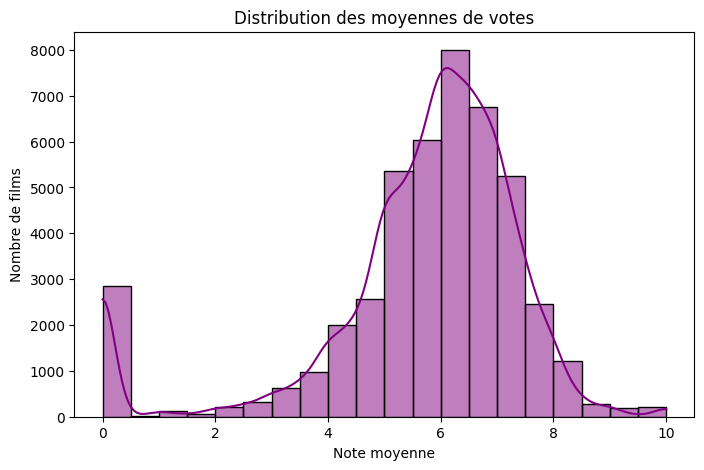

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(movies["vote_average"], bins=20, kde=True, color='purple')
plt.title("Distribution des moyennes de votes")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de films")
plt.show()

L'histogramme présenté illustre la répartition des notes moyennes obtenues par des films ("Distribution des moyennes de votes"). L'axe horizontal indique la note moyenne ("Note moyenne"), allant de 0 à 10. L'axe vertical, quant à lui, représente le nombre de films ("Nombre de films") ayant reçu chaque note moyenne.

L'analyse de ce graphique révèle plusieurs points importants :

Pic autour de 6-7 : On observe un pic significatif dans la tranche des notes moyennes comprises entre 6 et 7. Cela suggère que la majorité des films dans cet ensemble de données ont reçu des évaluations moyennes se situant dans cette fourchette.
Pic secondaire près de 0 : Un deuxième pic, bien que moins élevé, est visible autour de la note moyenne de 0. Ceci indique qu'un nombre non négligeable de films a obtenu des évaluations moyennes très basses.
Faible représentation des notes extrêmes (hors 0) : Le nombre de films diminue considérablement à mesure que l'on s'éloigne de la zone centrale (6-7) vers les extrémités de l'échelle des notes, tant pour les notes très basses (supérieures à 0) que pour les notes très élevées.
Distribution globalement asymétrique à gauche : La distribution des notes semble légèrement asymétrique à gauche, avec une queue plus longue s'étendant vers les notes moyennes plus faibles (si l'on ignore le pic distinct à 0).
En résumé, la distribution des notes moyennes des films est principalement concentrée autour des valeurs 6 et 7, avec une concentration notable de films ayant reçu une note de 0. Les films ayant des notes moyennes très hautes ou très basses (en dehors de 0) sont moins fréquents dans cet ensemble de données.

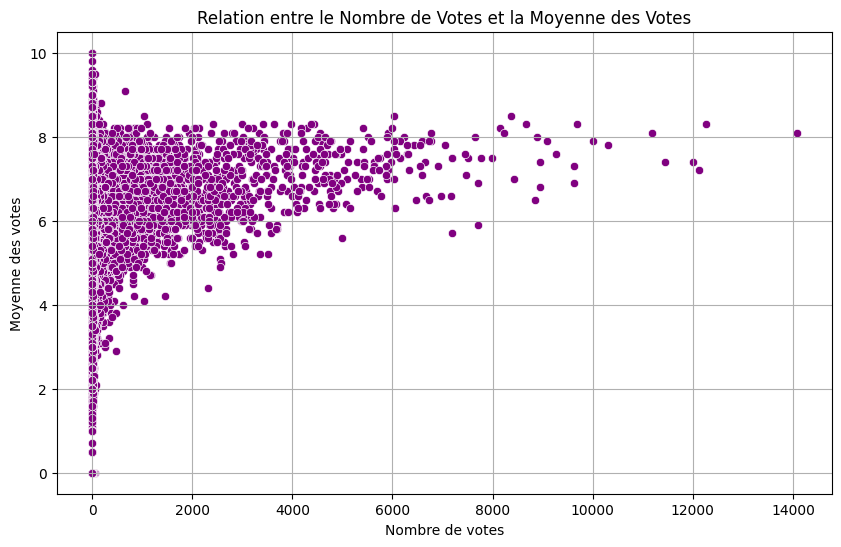

In [27]:
# Relation entre 'vote_count' et 'vote_average'

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies['vote_count'], y=movies['vote_average'], color='purple')
plt.title('Relation entre le Nombre de Votes et la Moyenne des Votes')
plt.xlabel('Nombre de votes')
plt.ylabel('Moyenne des votes')
plt.grid(True)  # Ajout d'une grille pour la lisibilité
plt.show()

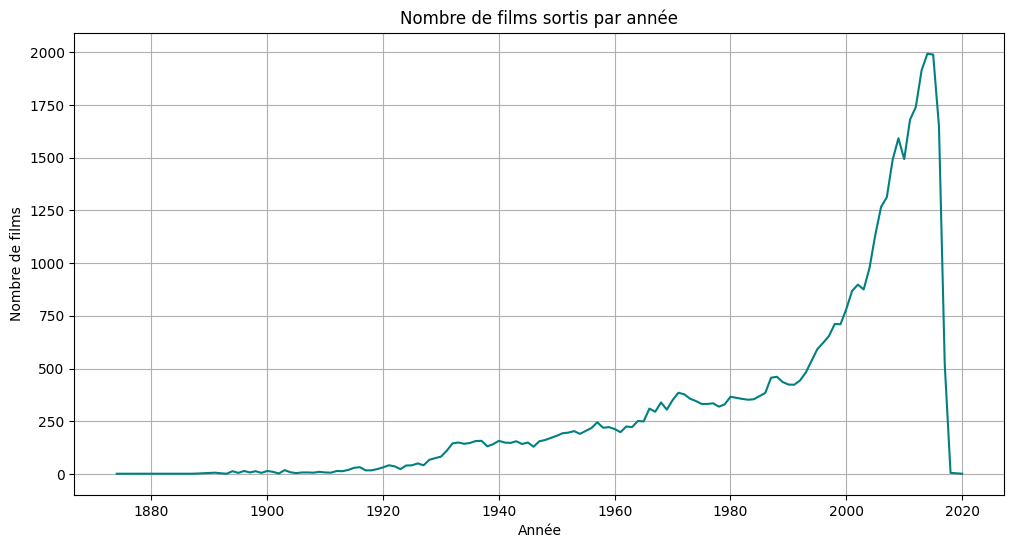

In [28]:
# Compter le nombre de films par année
films_par_annee = movies["release_date"].value_counts().sort_index()

# Tracer
plt.figure(figsize=(12, 6))
sns.lineplot(x=films_par_annee.index, y=films_par_annee.values, color="teal")
plt.title("Nombre de films sortis par année")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.grid(True)
plt.show()

### la plupart des films réalisent entre 2000 et 2015 

In [29]:
films_par_annee = movies.groupby("release_date")["title"].count()
print(films_par_annee)

release_date
1874       1
1878       1
1883       1
1887       1
1888       2
        ... 
2015    1989
2016    1649
2017     519
2018       5
2020       1
Name: title, Length: 135, dtype: int64


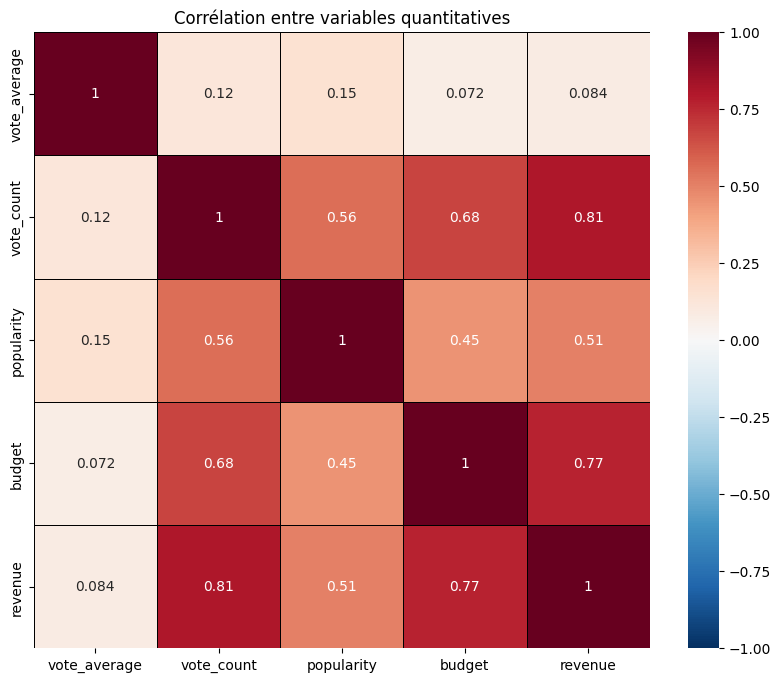

In [30]:
corr = movies[['vote_average', 'vote_count', 'popularity','budget', 'revenue']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, 
            square=True, linewidths=0.5, linecolor='black')
plt.title('Corrélation entre variables quantitatives')
plt.show()

vote_average (Note moyenne) et les autres variables :

Corrélation très faible avec vote_count (Nombre de votes) : 0.12
Corrélation faible avec popularity (Popularité) : 0.15
Corrélation très faible avec budget (Budget) : 0.072
Corrélation très faible avec revenue (Revenu) : 0.084
Interprétation : La note moyenne d'un film n'est que très faiblement liée au nombre de votes qu'il reçoit, à sa popularité, à son budget ou à ses revenus. Un film bien noté n'est pas nécessairement celui qui a le plus de votes, qui est le plus populaire, qui a coûté le plus cher ou qui a généré le plus de revenus.
vote_count (Nombre de votes) et les autres variables :

Corrélation modérée avec popularity (Popularité) : 0.56
Corrélation forte avec budget (Budget) : 0.68
Corrélation très forte avec revenue (Revenu) : 0.81
Interprétation : Le nombre de votes qu'un film reçoit a une corrélation modérée avec sa popularité (les films populaires ont tendance à recevoir plus de votes) et des corrélations fortes à très fortes avec son budget et ses revenus (les films avec des budgets plus importants et ceux qui génèrent plus de revenus ont tendance à avoir un plus grand nombre de votes).
popularity (Popularité) et les autres variables :

Corrélation modérée avec budget (Budget) : 0.45
Corrélation modérée avec revenue (Revenu) : 0.51
Interprétation : La popularité d'un film est modérément liée à son budget et à ses revenus. Les films avec des budgets plus importants et ceux qui rapportent plus d'argent ont tendance à être plus populaires.
budget (Budget) et revenue (Revenu) :

Corrélation très forte : 0.77
Interprétation : Il existe une très forte corrélation positive entre le budget d'un film et ses revenus. En général, les films avec des budgets plus élevés ont tendance à générer des revenus plus importants.

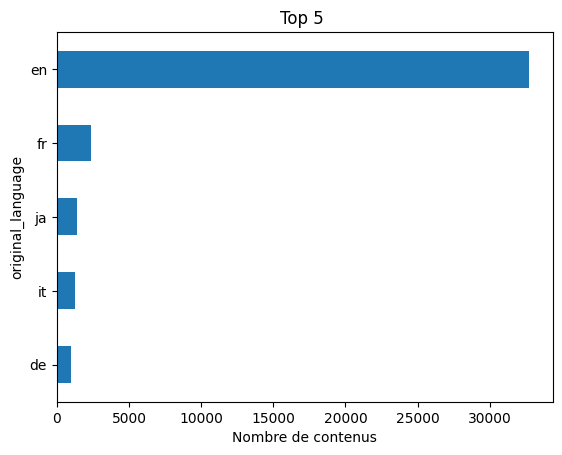

In [31]:
top= movies['original_language'].value_counts().head(5)

top.plot(kind='barh', title="Top 5 ")
plt.xlabel("Nombre de contenus")
plt.gca().invert_yaxis()
plt.show()

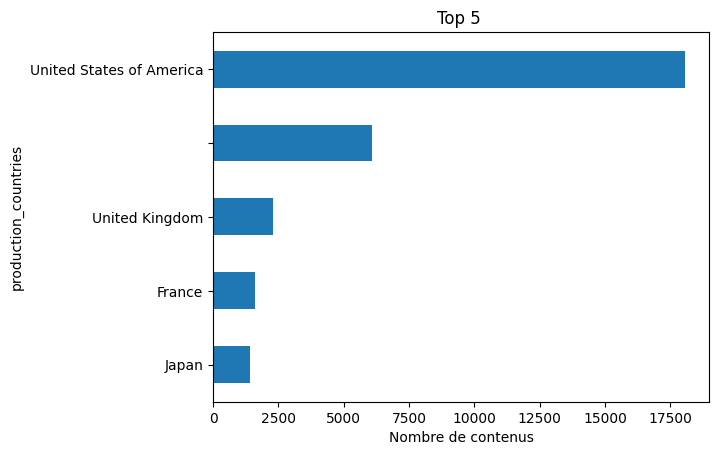

In [32]:
top = movies['production_countries'].value_counts().head(5)

top.plot(kind='barh', title="Top 5 ")
plt.xlabel("Nombre de contenus")
plt.gca().invert_yaxis()
plt.show()

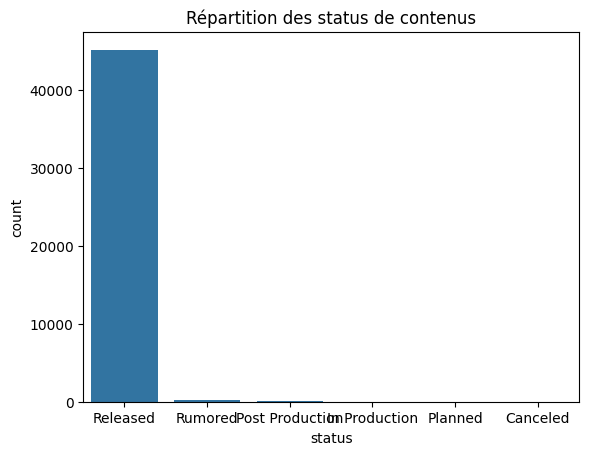

In [47]:
sns.countplot(data=movies, x='status')
plt.title("Répartition des status de contenus")
plt.show()

In [35]:
import pandas as pd



# Nombre de valeurs distinctes dans la colonne "status"
# Comptage des valeurs uniques et de leur fréquence
status_counts = movies["status"].value_counts()

print("Valeurs distinctes dans 'status' et leur nombre d'occurrences :\n", status_counts)


Valeurs distinctes dans 'status' et leur nombre d'occurrences :
 status
Released           45120
Rumored              223
Post Production       98
In Production         17
Planned               12
Canceled               1
Name: count, dtype: int64


Released (45,120 films) : Ces films ont été officiellement publiés et sont disponibles pour le public.

Rumored (223 films) : Il s’agit de films qui ont été mentionnés ou supposés être en production, mais dont l’existence n’a pas été confirmée.

Post Production (98 films) : Ces films ont terminé le tournage et sont en phase de montage, d’effets spéciaux, et de finalisation avant leur sortie.

In Production (17 films) : Ces films sont actuellement en tournage et en phase de production.

Planned (12 films) : Des films qui sont prévu, mais dont le tournage n’a pas encore commencé.

Canceled (1 film) : Films dont la production a été annulée et qui ne verront probablement jamais le jour.

Ce statut est important pour l’analyse des recommandations, car il permet d’exclure certains films qui n’ont jamais été publiés ou qui sont encore en production. Si tu veux affiner ton projet, tu pourrais limiter tes recommandations aux films ayant le statut Released pour éviter les films qui ne sont pas encore disponibles.

In [43]:
# Filtrer les films dont le status est "Rumored" et afficher uniquement "title" et "vote_average"
films_rumored = movies[movies["status"] == "In Production"][["title", "vote_average"]]

# Afficher les résultats
print(films_rumored)

                                     title  vote_average
16017                             Deadline           5.2
19707                  Student of the Year           6.2
23619      Ju-on: The Beginning of the End           6.0
26404                             Avatar 2           0.0
32082                 Swallows and Amazons           6.9
32821                         French Blood           5.9
32972                           Sly Cooper           0.0
32984                      Pitch Perfect 3           0.0
35941                               Old 37           4.3
35942                               Old 37           4.3
36768                       Piranha Sharks           5.0
39476           Vares - The Girls of April           5.3
40889                    Roles in the Wind           6.1
42398               Boo! A Madea Halloween           5.3
42668  Edgar Allan Poe's Lighthouse Keeper           5.4
45042                               Hickok           5.0
45064                          

## les lignes doublons


In [44]:
doublons = movies[movies.duplicated()]

# Afficher les lignes dupliquées
print(doublons)

       adult budget                                             genres  \
670    False      0                                     Drama, Romance   
671    False      0                                     Drama, Romance   
672    False      0                                     Drama, Romance   
827    False      0                                              Drama   
828    False      0                                              Drama   
...      ...    ...                                                ...   
44866  False      0  Adventure, Fantasy, Animation, Science Fiction...   
45279  False      0                                      Comedy, Drama   
45280  False      0                                      Comedy, Drama   
45281  False      0                                      Comedy, Drama   
45282  False      0                                      Comedy, Drama   

           id    imdb_id original_language  \
670    105045  tt0111613                de   
671    105045  tt01

In [45]:
nombre_doublons = movies.duplicated().sum()
print("Nombre total de doublons :", nombre_doublons)


Nombre total de doublons : 1140


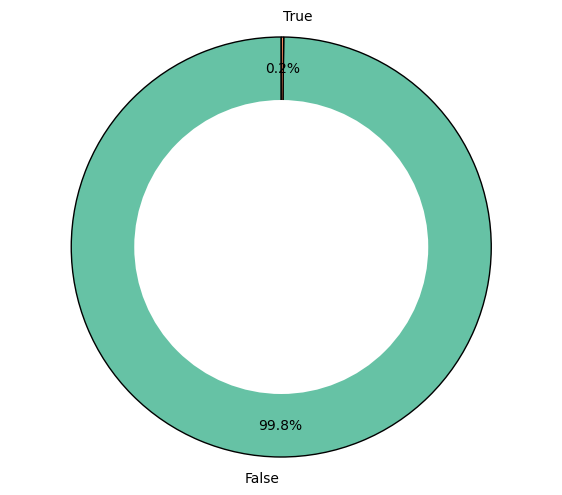

In [49]:

content_counts = movies['video'].value_counts()

# Définir les couleurs avec Seaborn
colors = sns.color_palette("Set2", len(content_counts))

# Créer le graphique en secteur
plt.figure(figsize=(7, 6))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

# Ajouter un cercle au centre pour créer un effet donut
centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', lw=0)
plt.gca().add_artist(centre_circle)


# Afficher le graphique
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

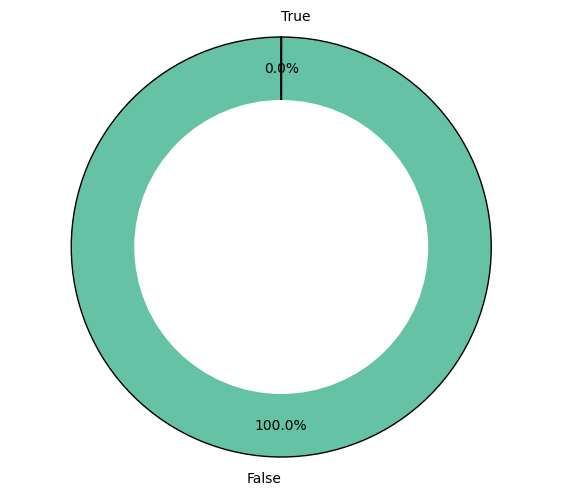

In [50]:
content_counts = movies['adult'].value_counts()

# Définir les couleurs avec Seaborn
colors = sns.color_palette("Set2", len(content_counts))

# Créer le graphique en secteur
plt.figure(figsize=(7, 6))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

# Ajouter un cercle au centre pour créer un effet donut
centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', lw=0)
plt.gca().add_artist(centre_circle)


# Afficher le graphique
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [47]:
movies.head()

,adult,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,video,vote_average,vote_count,keywords,cast
0,False,30000000,"Animation, Comedy, Family",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995,373554033.0,81.0,Released,Toy Story,False,7.7,5415,"jealousy, toy, boy, friendship, friends, rival...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,65000000,"Adventure, Fantasy, Family",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995,262797249.0,104.0,Released,Jumanji,False,6.9,2413,"board game, disappearance, ""based on childrens...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,0,"Romance, Comedy",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,1995,0.0,101.0,Released,Grumpier Old Men,False,6.5,92,"fishing, best friend, duringcreditsstinger, ol...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,16000000,"Comedy, Drama, Romance",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34,"based on novel, interracial relationship, sing...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,0,Comedy,11862,tt0113041,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,1995,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173,"baby, midlife crisis, confidence, aging, daugh...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


## les colonnes qui ne sont pas une impact sur la recommandation :
## budget , production_companies , revenue ,video , status

In [52]:
import pandas as pd

# Supposons que votre dataset est déjà chargé dans un DataFrame nommé df
nombre_de_colonnes = len(movies.columns)
print(f"Votre dataset contient {nombre_de_colonnes} colonnes.")

Votre dataset contient 20 colonnes.


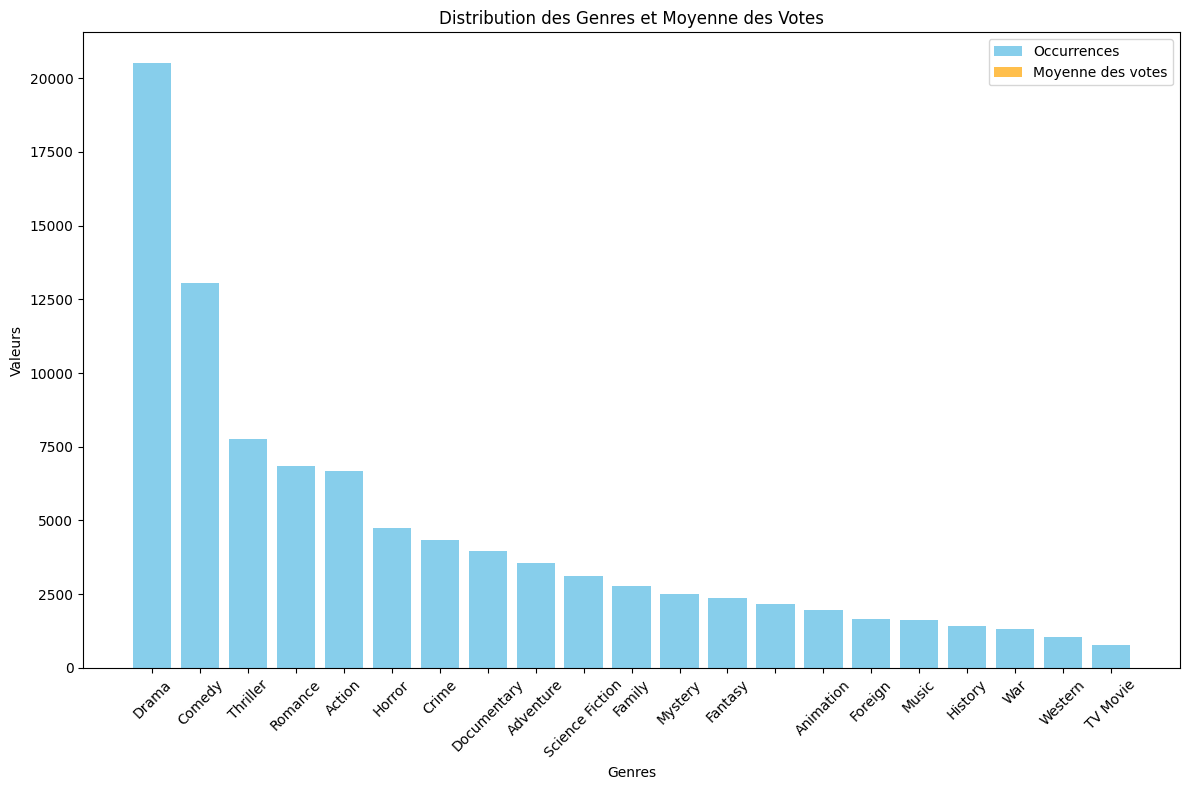

In [53]:
import pandas as pd
import matplotlib.pyplot as plt



# Nettoyage des genres : suppression des espaces supplémentaires
movies['genres'] = movies['genres'].fillna('')  # Remplissage des valeurs manquantes
movies['genres'] = movies['genres'].str.split(',')  # Diviser les genres en listes
movies['genres'] = movies['genres'].apply(lambda genres: [genre.strip() for genre in genres])  # Nettoyage des espaces

# Comptage des genres par film et calcul de la moyenne des votes
genre_popularity = {}
for index, row in movies.iterrows():
    for genre in row['genres']:
        if genre not in genre_popularity:
            genre_popularity[genre] = {'count': 0, 'vote_sum': 0}
        genre_popularity[genre]['count'] += 1
        genre_popularity[genre]['vote_sum'] += row['vote_average']

# Transformer en dataframe
genre_df = pd.DataFrame.from_dict(genre_popularity, orient='index')
genre_df['vote_average'] = genre_df['vote_sum'] / genre_df['count']

# Tri par occurrence
genre_df = genre_df.sort_values(by='count', ascending=False)

# Création du graphique en barres empilées
plt.figure(figsize=(12, 8))
plt.bar(genre_df.index, genre_df['count'], label="Occurrences", color="skyblue")
plt.bar(genre_df.index, genre_df['vote_average'], label="Moyenne des votes", color="orange", alpha=0.7)

plt.xlabel("Genres")
plt.ylabel("Valeurs")
plt.title("Distribution des Genres et Moyenne des Votes")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


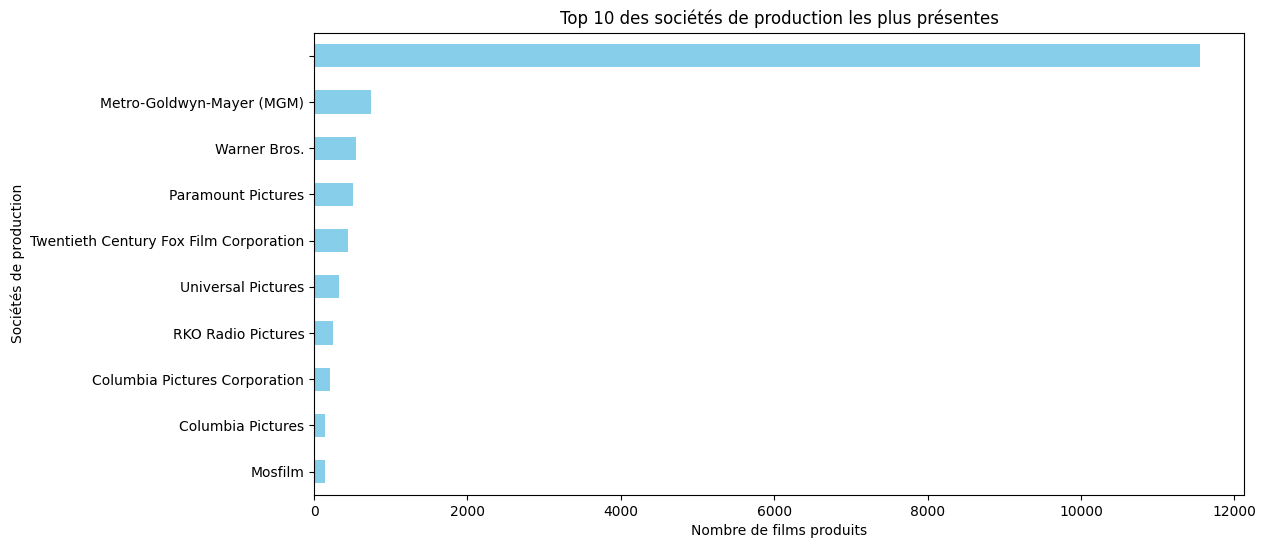

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Compter les occurrences des sociétés de production
top_companies = movies["production_companies"].value_counts().head(10)  # Les 10 sociétés les plus présentes

# Création du graphique
plt.figure(figsize=(12, 6))
top_companies.plot(kind='barh', color='skyblue')
plt.xlabel("Nombre de films produits")
plt.ylabel("Sociétés de production")
plt.title("Top 10 des sociétés de production les plus présentes")
plt.gca().invert_yaxis()  # Inverser l'ordre pour une meilleure lisibilité
plt.show()


In [47]:
print(movies["production_companies"].nunique())


22393


trop de valeurs uniques : Avec 22,393 sociétés différentes, il est difficile de tirer des tendances exploitables. Cette diversité excessive rend la colonne moins utile pour un modèle de recommandation.

Peu de pertinence pour la similarité : Un utilisateur choisit rarement un film en fonction de la société de production. Les critères comme les genres, les acteurs et la popularité sont bien plus influents pour recommander un film

## durée de film

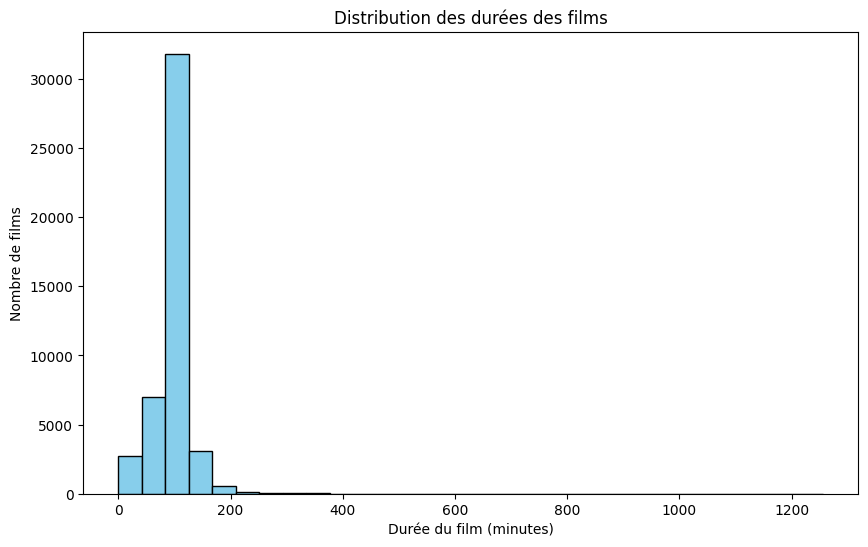

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Création d'un histogramme pour la durée des films
plt.figure(figsize=(10, 6))
movies["runtime"].hist(bins=30, color='skyblue', edgecolor='black')

plt.xlabel("Durée du film (minutes)")
plt.ylabel("Nombre de films")
plt.title("Distribution des durées des films")
plt.grid(False)  # Supprimer la grille pour un affichage plus clair
plt.show()


In [48]:
# Afficher les colonnes du DataFrame
print(movies.columns)

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'title', 'video', 'vote_average', 'vote_count', 'keywords', 'cast'],
      dtype='object')


In [50]:
# Suppression des colonnes inutiles
columns_to_drop = ["imdb_id", "video", "production_companies", "budget", "revenue", "status"]
movies.drop(columns=columns_to_drop, inplace=True)

# Suppression des lignes en double
movies.drop_duplicates(inplace=True)

# Enregistrement du fichier nettoyé
movies.to_csv("abdo.csv", index=False)

print("Le fichier nettoyé a été enregistré sous le nom 'abdo.csv'.")

Le fichier nettoyé a été enregistré sous le nom 'abdo.csv'.


In [54]:
df=pd.read_csv("abdo.csv")
df.head()

,adult,genres,id,original_language,overview,popularity,production_countries,release_date,runtime,title,vote_average,vote_count,keywords,cast
0,False,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,1995,81.0,Toy Story,7.7,5415,"jealousy, toy, boy, friendship, friends, rival...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,"Adventure, Fantasy, Family",8844,en,When siblings Judy and Peter discover an encha...,17.015539,United States of America,1995,104.0,Jumanji,6.9,2413,"board game, disappearance, ""based on childrens...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,"Romance, Comedy",15602,en,A family wedding reignites the ancient feud be...,11.712900,United States of America,1995,101.0,Grumpier Old Men,6.5,92,"fishing, best friend, duringcreditsstinger, ol...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,"Comedy, Drama, Romance",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,1995,127.0,Waiting to Exhale,6.1,34,"based on novel, interracial relationship, sing...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,United States of America,1995,106.0,Father of the Bride Part II,5.7,173,"baby, midlife crisis, confidence, aging, daugh...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


In [55]:
df.shape


(44331, 14)

In [57]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 44331 non-null  bool   
 1   genres                42220 non-null  object 
 2   id                    44331 non-null  int64  
 3   original_language     44331 non-null  object 
 4   overview              44331 non-null  object 
 5   popularity            44331 non-null  float64
 6   production_countries  38448 non-null  object 
 7   release_date          44331 non-null  int64  
 8   runtime               44331 non-null  float64
 9   title                 44331 non-null  object 
 10  vote_average          44331 non-null  float64
 11  vote_count            44331 non-null  int64  
 12  keywords              30857 non-null  object 
 13  cast                  42081 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 4.4+ MB


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("abdo.csv")
data.isnull().sum()

adult                       0
genres                   2111
id                          0
original_language           0
overview                    0
popularity                  0
production_countries     5883
release_date                0
runtime                     0
title                       0
vote_average                0
vote_count                  0
keywords                13474
cast                     2250
dtype: int64

<Axes: >

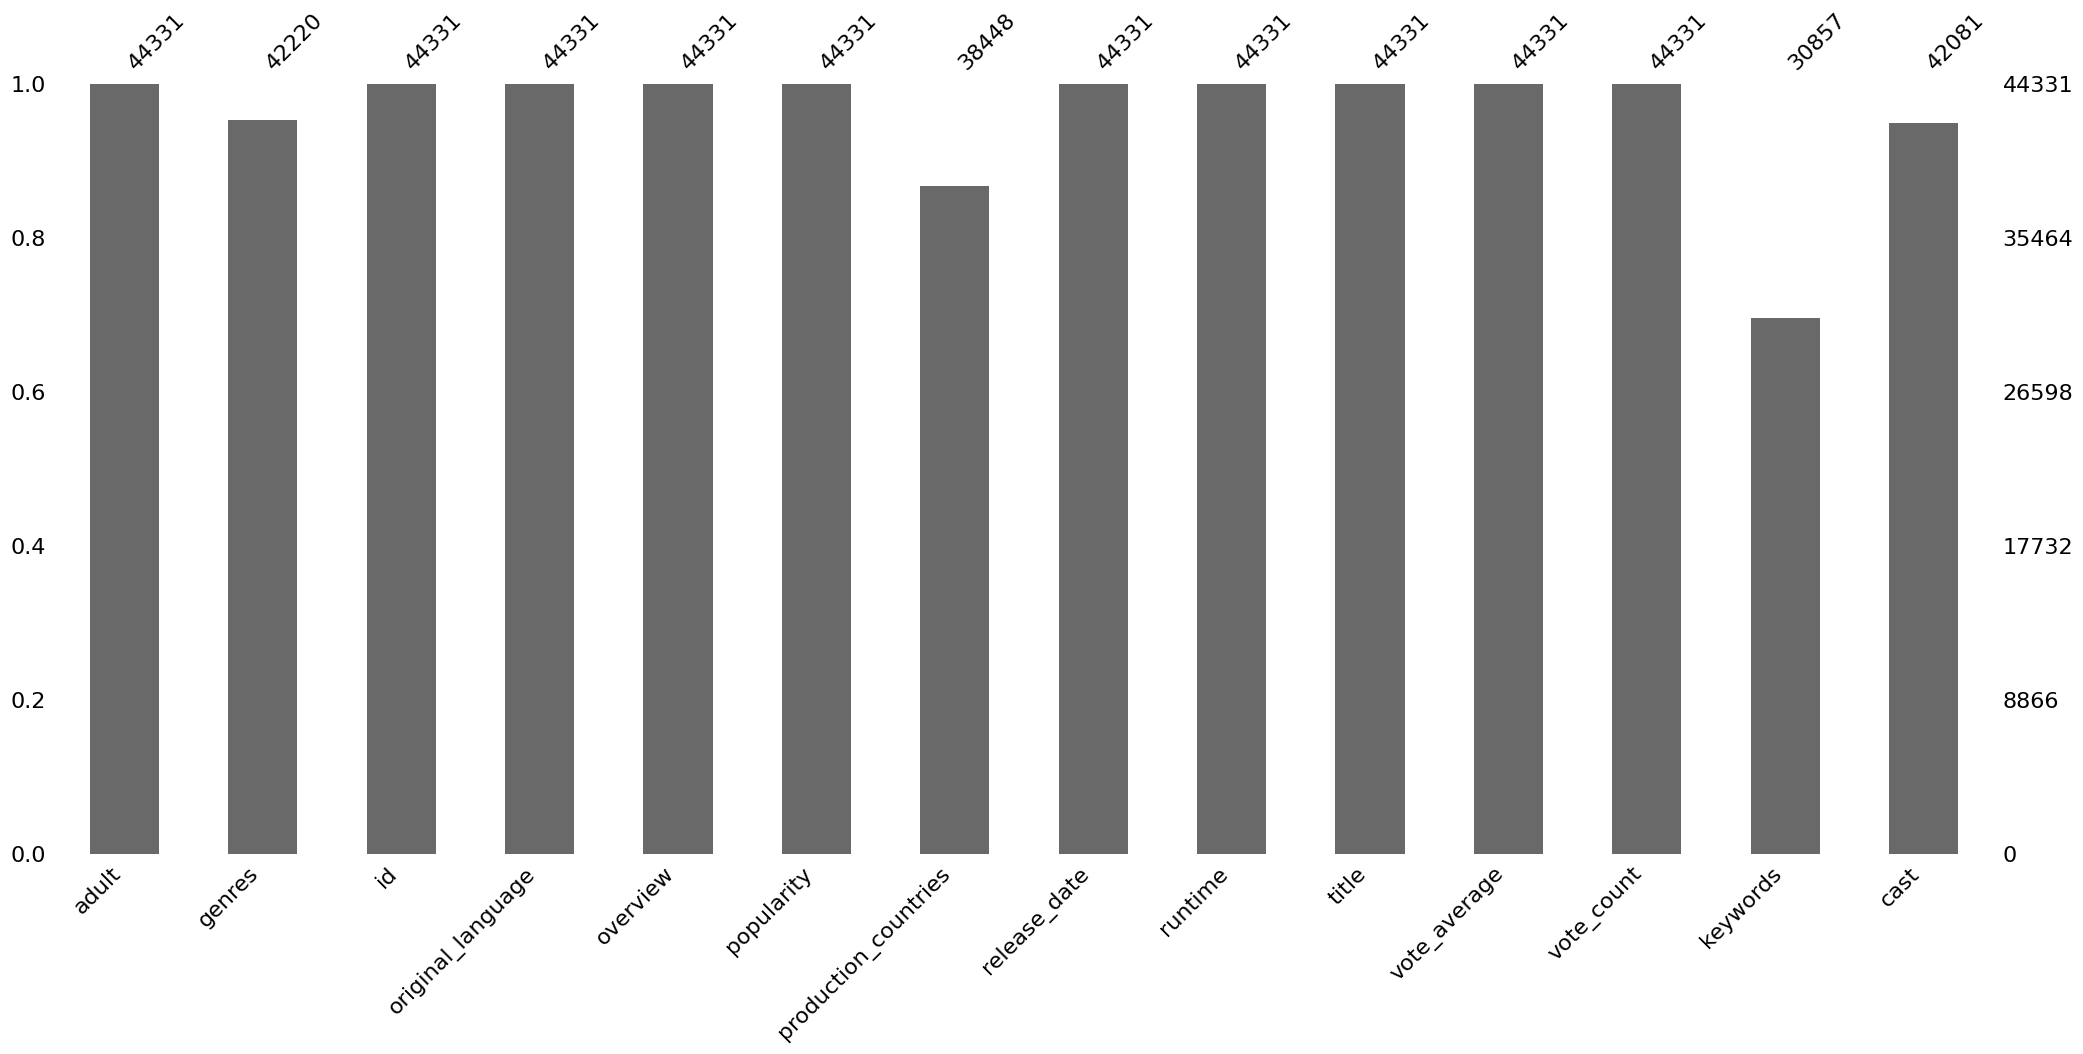

In [3]:
import missingno as msno
msno.bar(data)

In [7]:
import pandas as pd

# 📂 Charger le dataset
DATA_PATH = "abdo.csv"  # Assure-toi que le fichier existe
df = pd.read_csv(DATA_PATH)

# 🔥 Supprimer les valeurs manquantes des colonnes spécifiques
columns_to_clean = ["genres", "keywords", "cast"]
df_cleaned = df.dropna(subset=columns_to_clean)

# 🗑️ Supprimer complètement la colonne `production_countries`
if "production_countries" in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=["production_countries"])

# 💾 Sauvegarder le dataset nettoyé
df_cleaned.to_csv("movie_data_cleaned.csv", index=False)

# ✅ Afficher le nombre de lignes supprimées et confirmer la suppression
removed_rows = len(df) - len(df_cleaned)
print(f"✨ Nettoyage terminé : {removed_rows} lignes supprimées avec valeurs manquantes.")
print(f"📌 Colonnes restantes : {df_cleaned.columns.tolist()}")



✨ Nettoyage terminé : 14625 lignes supprimées avec valeurs manquantes.
📌 Colonnes restantes : ['adult', 'genres', 'id', 'original_language', 'overview', 'popularity', 'release_date', 'runtime', 'title', 'vote_average', 'vote_count', 'keywords', 'cast']


In [8]:
dr=pd.read_csv("movie_data_cleaned.csv")
dr.shape


(29706, 13)

In [9]:
dr.isnull().sum()

adult                0
genres               0
id                   0
original_language    0
overview             0
popularity           0
release_date         0
runtime              0
title                0
vote_average         0
vote_count           0
keywords             0
cast                 0
dtype: int64